# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

# Data collection and Preprocessng

In [2]:
store_df=pd.read_csv('store.csv')

In [3]:
rossman=pd.read_csv('Rossmann Stores Data.csv',low_memory='False')

<ipython-input-3-3f3684f0fff0>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman=pd.read_csv('Rossmann Stores Data.csv',low_memory='False')


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
rossman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<ipython-input-9-3b169fbcdf49>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=store_df['CompetitionDistance'], hist = True)


Text(0.5, 0, 'Competition Distance Distribution Plot')

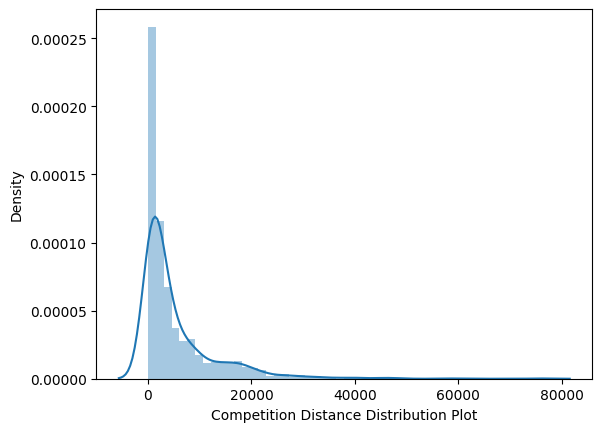

In [9]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')


In [10]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

#dropping coluns from store dataset which contains too many null values
store_df.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)


In [11]:
store_df.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

# Merging of two datasets

In [12]:
data=rossman.merge(right=store_df,on='Store',how='left')

In [13]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [14]:
data.shape

(1017209, 13)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


In [16]:
# creating year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['weekOfYear']=data['Date'].dt.weekofyear
data['DayOfYear']=data['Date'].dt.dayofyear

<ipython-input-16-73bda3d38073>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['weekOfYear']=data['Date'].dt.weekofyear


In [17]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

In [18]:
df=data.copy()

In [19]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,Month,weekOfYear,DayOfYear
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31,212
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31,212
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31,212
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31,212
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31,212


In [20]:
df.shape

(1017209, 16)

In [21]:
#let's convert stateholiday into state_holiday yes(1) or no(0)
df['state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

In [22]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)


# EDA
# Chart 1 - Sales vs Day of week

In [23]:
#creating a dataset where ['Sales']!=0
df1=df[df['Sales']!=0]

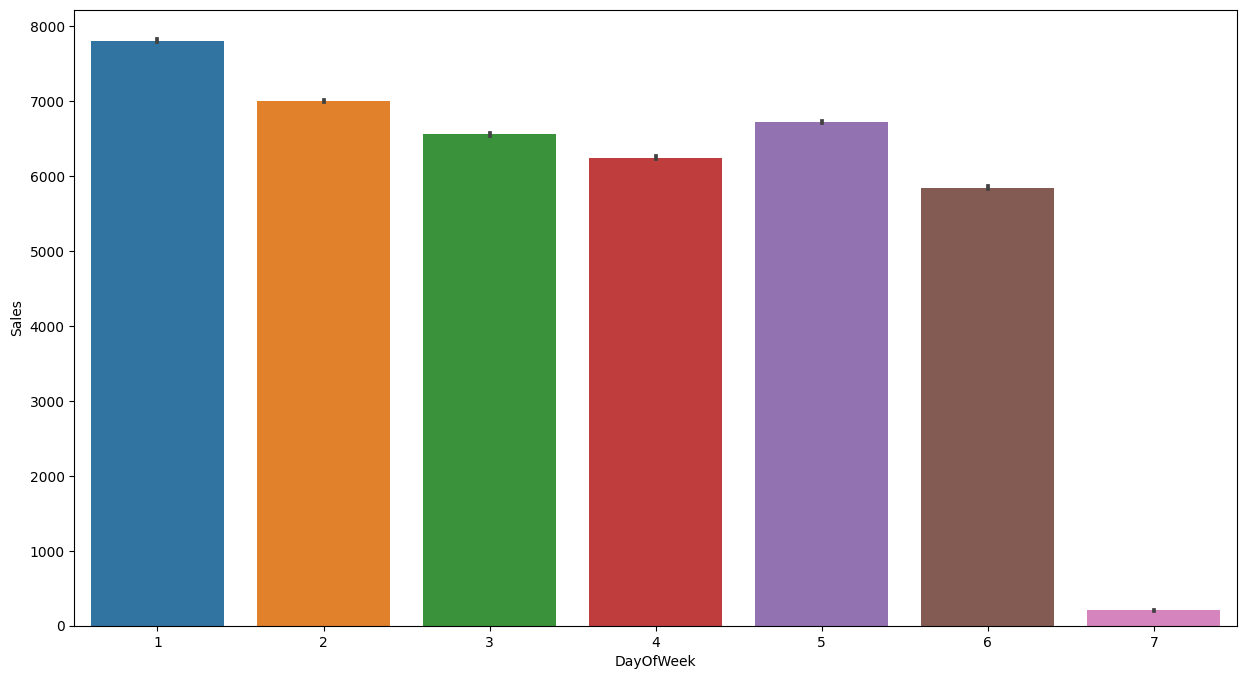

In [24]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x=df['DayOfWeek'], y=df['Sales'] );

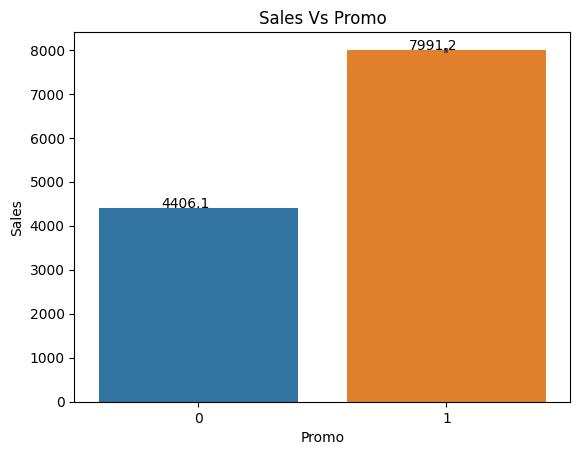

In [25]:
# Chart -  Sales Vs Promo
#Bivariate Analysis
ax=sns.barplot(x=df['Promo'],y=df['Sales'])
plt.title('Sales Vs Promo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

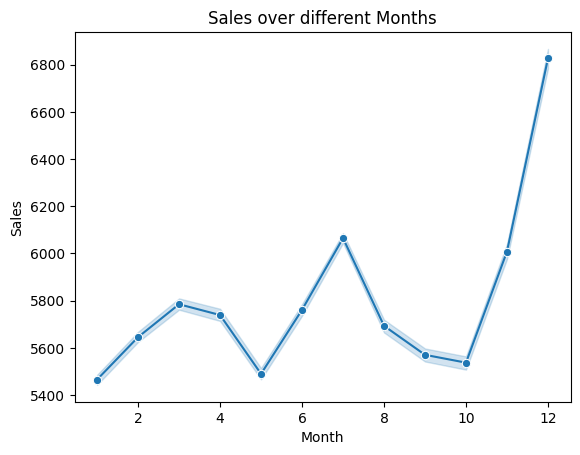

In [26]:
# Chart - Sales Over Months
#Bivariate Analysis
ax=sns.lineplot(x=df['Month'],y=df['Sales'],marker='o')
plt.title('Sales over different Months')
plt.show()



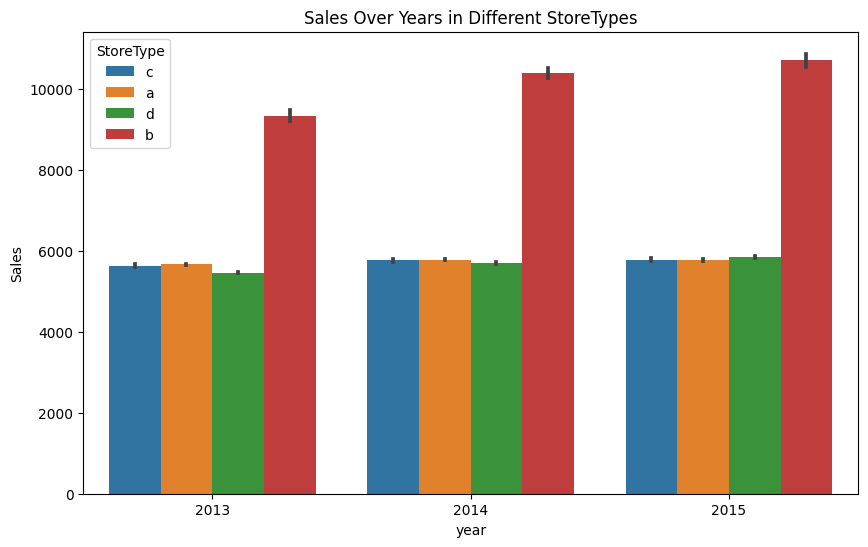

In [27]:
# Chart -  Sales Over Years in Different StoreTypes
#Multivariate Analysis
plt.figure(figsize=(10,6))
sns.barplot(x=df['year'],y=df['Sales'],hue=df['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show()

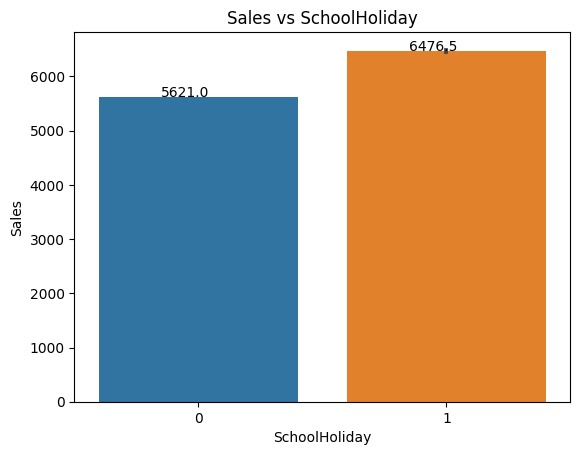

In [28]:
# Chart -  Sales vs SchoolHoliday
#Bivaraite Analysis
ax=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'])
plt.title('Sales vs SchoolHoliday')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


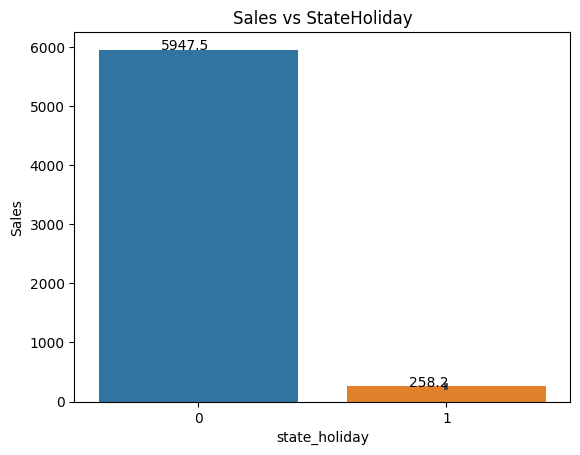

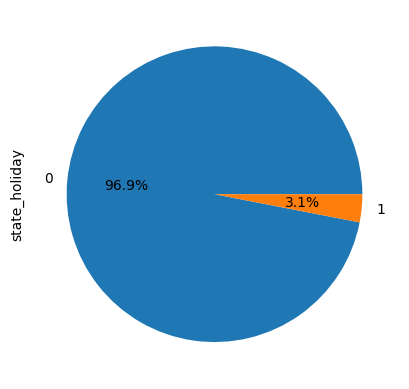

In [29]:
# Chart - sales vs StateHoliday
#Bivariate Analysis
#plotting barplot
ax=sns.barplot(x=df['state_holiday'],y=df['Sales'])
plt.title('Sales vs StateHoliday')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
#plotting pie chart
df['state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

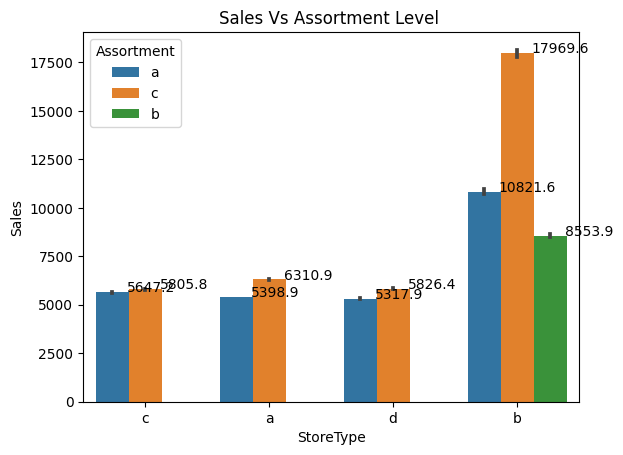

In [30]:
# Chart - Sales vs AssortmentLevel in all stores
#Multivaraite Analysis
ax=sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Sales vs Customer')

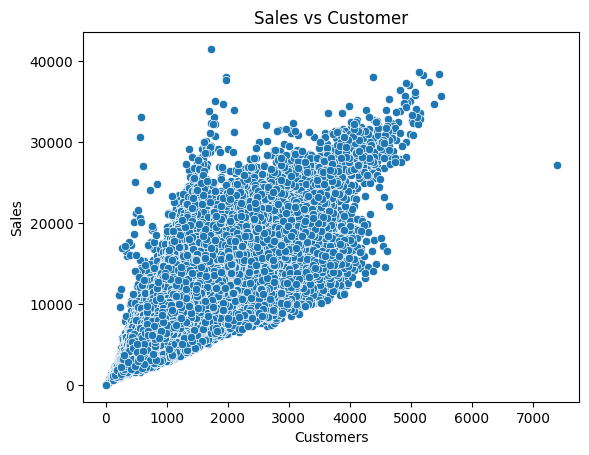

In [31]:
# Chart -  Relation between Sales and Customer
#Bivariate Analysis
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

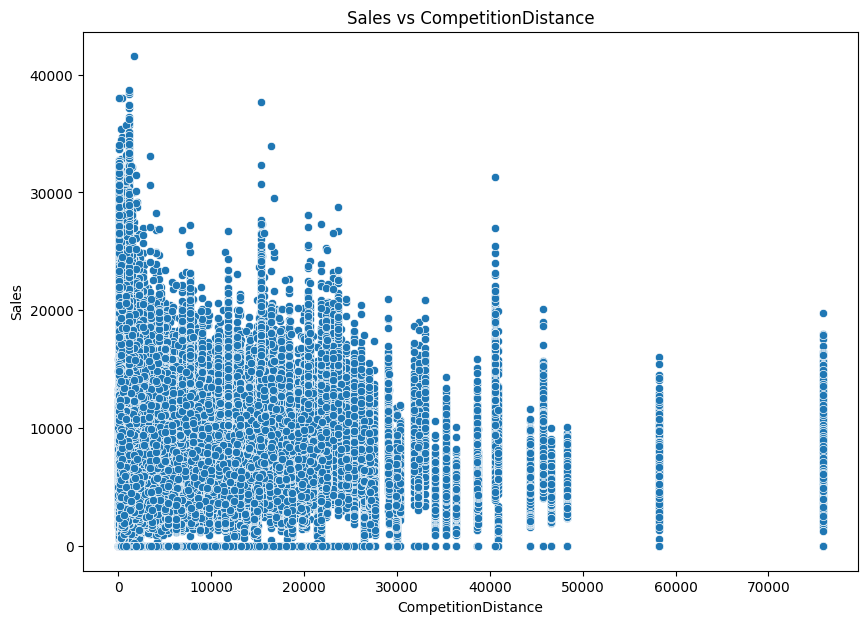

In [32]:
# Chart - visualization code
#Bivariate Analysis
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

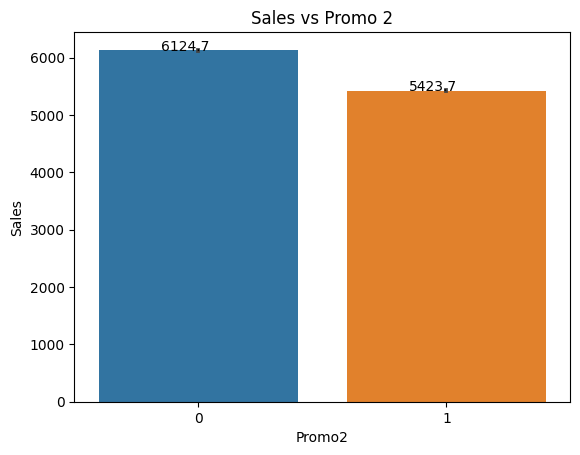

In [33]:
# Chart - visualization code
#Bivariate Analysis
ax=sns.barplot(x=df['Promo2'],y=df['Sales'])
plt.title('Sales vs Promo 2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


<ipython-input-34-abf0a9fbe99a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

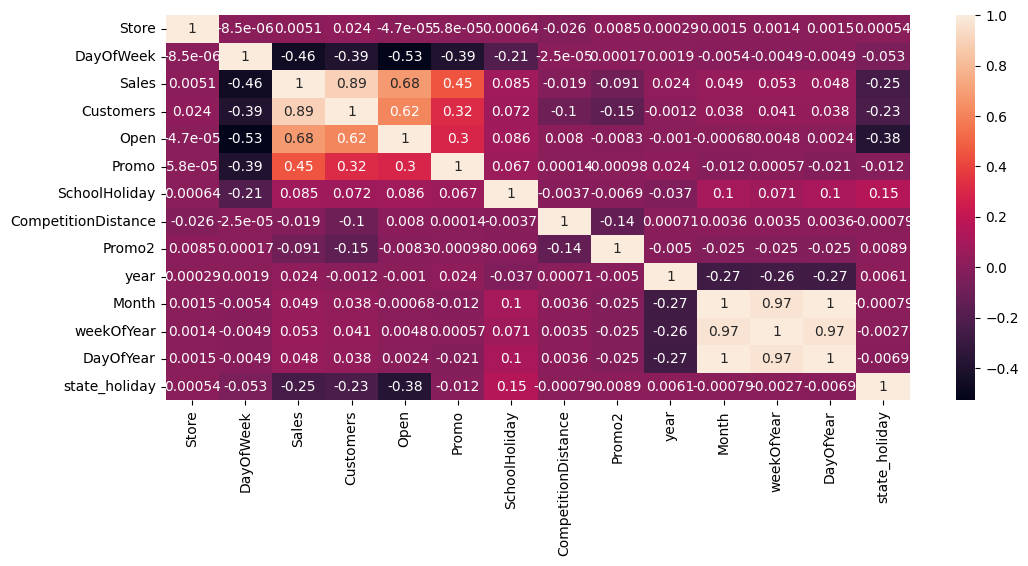

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr=df.corr()
sns.heatmap(corr,annot=True)

# Feature Engineering and Data pre-processing

In [35]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   SchoolHoliday        1017209 non-null  int64  
 7   StoreType            1017209 non-null  object 
 8   Assortment           1017209 non-null  object 
 9   CompetitionDistance  1017209 non-null  float64
 10  Promo2               1017209 non-null  int64  
 11  year                 1017209 non-null  int64  
 12  Month                1017209 non-null  int64  
 13  weekOfYear           1017209 non-null  int64  
 14  DayOfYear            1017209 non-null  int64  
 15

In [36]:
#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')



In [37]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()


Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
Month                  0
weekOfYear             0
DayOfYear              0
state_holiday          0
dtype: int64

In [38]:
#Encode the cetagorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)



In [39]:
#head of the data after categorical encoding
encoded_df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,year,Month,weekOfYear,DayOfYear,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1,1270,0,2015,7,31,212,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,570,1,2015,7,31,212,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,14130,1,2015,7,31,212,0,0,0,0,0,0
3,4,5,13995,1498,1,1,1,620,0,2015,7,31,212,0,0,1,0,0,1
4,5,5,4822,559,1,1,1,29910,0,2015,7,31,212,0,0,0,0,0,0


In [40]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [41]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [42]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [43]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [44]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [45]:
df_new=df.copy()

In [46]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [47]:
df_new.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,year,Month,weekOfYear,DayOfYear,state_holiday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1270,0,2015,7,31,212,0,0,0,1,0,1,0,0
1,2,5,6064,625,1,1,570,1,2015,7,31,212,0,1,0,0,0,1,0,0
2,3,5,8314,821,1,1,14130,1,2015,7,31,212,0,1,0,0,0,1,0,0
3,4,5,13995,1498,1,1,620,0,2015,7,31,212,0,0,0,1,0,0,0,1
4,5,5,4822,559,1,1,29910,0,2015,7,31,212,0,1,0,0,0,1,0,0


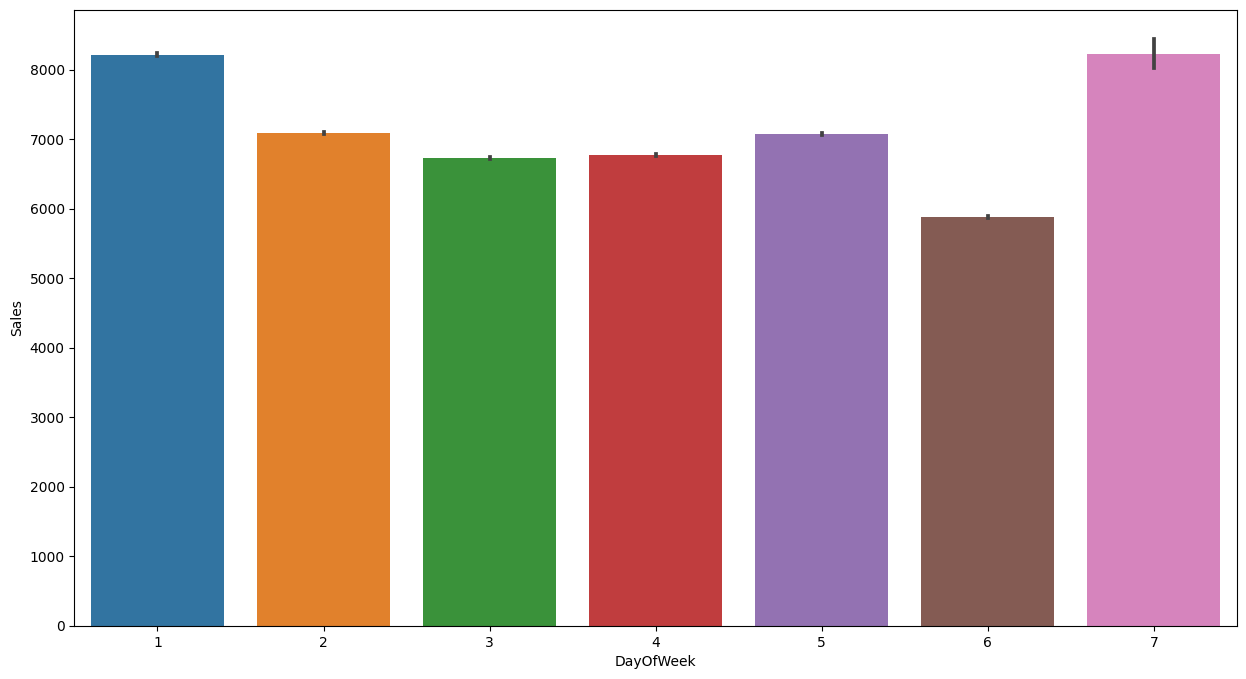

In [48]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

In [49]:
X = df_new.drop(['Sales','Store','year'] , axis = 1)
y= df_new.Sales

In [50]:
X.shape

(844338, 17)

In [84]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
X=sc.fit_transform(X)

In [86]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((591036, 17), (253302, 17), (591036,), (253302,))

# ML Models - 1. Linear Regression

In [89]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [90]:
#coefficients
lr.coef_

array([-6.87945414e+01,  2.96383004e+03,  5.69533228e+02,  1.04507288e+01,
        1.97509359e+02,  1.51608465e+02, -5.98270540e+01, -2.80295679e+01,
        1.68472305e+02,  7.93152304e+00, -7.26490242e+12, -1.96089404e+12,
       -4.96336844e+12, -6.72163488e+12, -9.95628471e+12, -1.95668898e+12,
       -9.94394664e+12])

In [91]:
#intercept
lr.intercept_


6957.288345153039

In [92]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [94]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 1698212.1525925617
MSE test score is : 1708307.4181316504
RMSE train Score:  1303.1546925029897
RMSE test Score:  1307.0223479847812
r2 train score:  0.8237790482837363
r2 test score:  0.8225355525676935


# ML Model 2 - Ridge Regression

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)


best param: {'alpha': 10}
best score: 0.8237577045246148


In [101]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)


MSE train score is : 1698212.1246471328
MSE test score is : 1708304.1585785428
RMSE train Score:  1303.1546817807673
RMSE test Score:  1307.0211010456346
r2 train score:  0.823779051183592
r2 test score:  0.8225358911805128


# ML Model 3- Decision Tree

In [106]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)


In [107]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 160170.33701545966
MSE test score is : 578828.4115782998
RMSE train Score:  400.21286463013615
RMSE test Score:  760.8077362765838
r2 train score:  0.9833793621235787
r2 test score:  0.9398694502355978
